# PIK 87/3

In [2]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

con = sqlite3.connect("../data/CongoDB.sqlite")

## Funde

In [2]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Anzahl,
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Art
       FROM t_Obj 
       WHERE (((t_Obj.ort_kurz) = 'PIK')
           AND ((t_Obj.Komplex) = '87/3'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
df['Gewicht'] = df['Gewicht'].convert_objects(convert_numeric=True)
#df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
display(df.head())

,ort_kurz,Komplex,Individuum,Typ,Anzahl,Gewicht,Gr_Clist,Art
0,PIK,87/3,None,None,1,314,120,Schlacke
1,PIK,87/3,None,None,2,106,70,Schlacke
2,PIK,87/3,None,None,5,115,70,Schlacke
3,PIK,87/3,/I:1-2,EBA,1,86,120,K
4,PIK,87/3,-X:22,KON (?),1,9,70,K


In [3]:
df_pivot1 = df.pivot_table(values = 'Gewicht', index = 'Art', aggfunc = sum)
df_pivot1

Art
Eisen         35
HL            70
K            337
Schlacke    1987
Name: Gewicht, dtype: int64

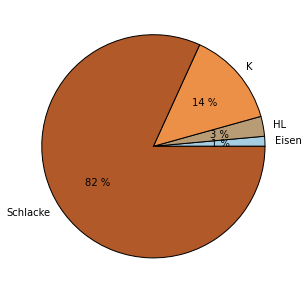

In [4]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot1.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')
plt.savefig('../output/figs/9-10_PIK87-3_Funde.pdf', bbox_inches='tight')

> **PIK 87/3** Funde

In [6]:
df_pivot1 = df.pivot_table(values = 'Gewicht', index = 'Art', aggfunc = sum, fill_value = 0)
df_pivot1 = pd.DataFrame(df_pivot1)
# df_pivot1 = df_pivot1.reset_index()
df_pivot1.rename(index={'HL': 'gebrannter Lehm', 'K': 'Keramik'}, inplace=True)
df_pivot1['\%'] = (df_pivot1['Gewicht']/df_pivot1['Gewicht'].sum()*100).round(1)
df_pivot1['Gewicht'] = (df_pivot1['Gewicht'] / 1000).round(2)
df_pivot1.rename(columns={'Gewicht': 'Gewicht (kg)'}, inplace=True)

df_pivot2 = df.pivot_table(values = 'Anzahl', index = 'Art', aggfunc = sum, fill_value = 0)
df_pivot2 = pd.DataFrame(df_pivot2)
df_pivot2.rename(index={'HL': 'gebrannter Lehm', 'K': 'Keramik'}, inplace=True)
df_pivot2['\%'] = (df_pivot2['Anzahl']/df_pivot2['Anzahl'].sum()*100).round(1)

# Tabellen vereinen:
df_concat = pd.concat([df_pivot2, df_pivot1], axis = 1)
df_concat = df_concat.reset_index()
df_concat.rename(columns={'Art': 'Fundkategorie'}, inplace=True)
df_concat.to_latex('../output/tabs/9-10_PIK87-3_Funde.tex', index = False, escape = False)
df_concat

,Fundkategorie,Anzahl,\%,Gewicht (kg),\%
0,Eisen,1,1.6,0.04,1.4
1,gebrannter Lehm,1,1.6,0.07,2.9
2,Keramik,34,54.8,0.34,13.9
3,Schlacke,26,41.9,1.99,81.8


## Keramik

In [3]:
sql = """SELECT
           t_Obj.objID, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Anzahl,
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Art
       FROM t_Obj 
       WHERE (((t_Obj.ort_kurz) = 'PIK')
           AND ((t_Obj.Komplex) = '87/3')
           AND (t_Obj.Art) = 'K')""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
df['Gewicht'] = df['Gewicht'].convert_objects(convert_numeric=True)
#df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
df_pivot2 = df.pivot_table(values = 'Gewicht', index = 'Typ', aggfunc = sum)
df_pivot2

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:16: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Typ
              134
EBA            86
EBA (?)        66
KON (?)         9
MDB (?)        13
PIKMUN (?)     29
Name: Gewicht, dtype: int64

In [4]:
df['Anzahl'].sum()

34

aufgenommene Keramik (Summe Gewicht):

In [5]:
df['Gewicht'].sum()

337

In [6]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot2.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')
plt.savefig('../output/figs/9-10_PIK87-3_Stilgruppen.pdf', bbox_inches='tight')

> **PIK 87/3** Stilgruppen

In [7]:
df_pivot3 = df.pivot_table(values = 'Gewicht', index = 'Gr_Clist', aggfunc = len)
df_pivot3['200'] = 0.
df_pivot3['>200'] = 0.
df_pivot3

Gr_Clist
30      11
70       9
120      1
200      0
>200     0
Name: Gewicht, dtype: float64

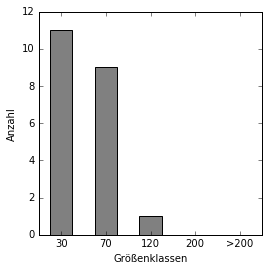

In [10]:
ax = df_pivot3.plot(kind = 'bar', color = 'grey')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
plt.xticks(rotation=0)
plt.xlabel('Größenklassen')
plt.ylabel('Anzahl')
plt.savefig('../output/figs/9-10_PIK87-3_Fragmentierung.pdf', bbox_inches='tight')
plt.show()

> **PIK 87/3** Fragmentierung

## Schlacke

In [34]:
sql = """SELECT
           t_Obj.objID, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Schlacke_Typ
       FROM t_Obj 
       WHERE (((t_Obj.ort_kurz) = 'PIK')
           AND ((t_Obj.Komplex) = '87/3')
           AND (t_Obj.Art) Like '%Schlacke%'
           AND ((t_Obj.Schlacke_Typ) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Gewicht'] = df['Gewicht'].convert_objects(convert_numeric=True)
#df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
df_pivot4 = df.pivot_table(values = 'Gewicht', index = 'Schlacke_Typ', aggfunc = sum)
df_pivot4

Schlacke_Typ
2a     109
2c     234
4a    1529
Name: Gewicht, dtype: int64

In [35]:
fig = plt.figure(1)
fig.set_size_inches(10,10)

plt.subplot(221)

df_pivot1.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')
plt.title('Fundkategorien')

plt.subplot(222)

df_pivot2.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')
plt.title('keramische Stilgruppen')

plt.subplot(223)

df_pivot4.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')
plt.title('Schlacketypen')

plt.subplot(224)

df_pivot3.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')
plt.title('Keramik Fragmentierung')

#plt.savefig('../output/figs/9-10_PIK87-3_Funde.pdf', bbox_inches='tight')
plt.show()

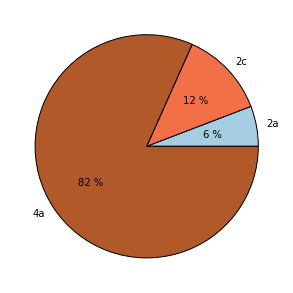

In [36]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot4.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')
#plt.title('Schlacketypen')
plt.savefig('../output/figs/9-10_PIK87-3_Schlacketypen.pdf', bbox_inches='tight')
plt.show()

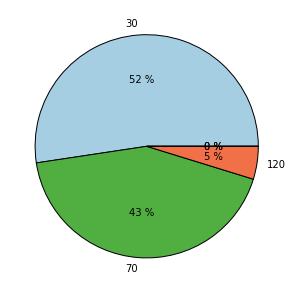

In [37]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot3.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')
#plt.title('Keramik Fragmentierung')
plt.savefig('../output/figs/9-10_PIK87-3_KerFragm.pdf', bbox_inches='tight')
plt.show()